In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss

#from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)

emotion_dict = {'SURPRISE' : 1, 'DISGUST' : 2, 'HAPPINESS' : 3, 'FEAR' : 4, 'ANGER' : 5, 'CONTEMPT' : 6, 'NEUTRAL' : 7,  'SADNESS' : 8}

In [2]:
def load_images(directory):
    data_legend = './data/facial_expressions/data/legend.csv'
    df = pd.read_csv(data_legend, delimiter=',', names=['user.id','image','emotion'], header=1)
    labels = []
    images = []
    for img_name in os.listdir(directory):
        index = np.where(df.image == img_name)
        if len(index[0]) > 0:
            img_path = os.path.join(directory, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            img = cv2.resize(img, (350, 350))  # Resize to a consistent size
            images.append(img)

            labels.append(emotion_dict[df.emotion[index[0][0]].upper()])

    return images, labels

In [3]:
data_dir = './data/facial_expressions/images'
print("loading images")
X, y = np.array(load_images(data_dir))
X = np.array([img.flatten() for img in X])
y = y.astype('int')

print('loaded images')
rate = 0.01
X_tr_1, X_te_1, y_tr_1, y_te_1 = train_test_split(X, y, test_size=0.1, random_state=seed, shuffle=True)
X_tr_2, X_te_2, y_tr_2, y_te_2 = train_test_split(X, y, test_size=0.25, random_state=seed, shuffle=True)
X_tr_3, X_te_3, y_tr_3, y_te_3 = train_test_split(X, y, test_size=0.5, random_state=seed, shuffle=True)
scores = [0, 0, 0, 0, 0]
print(scores[4])

loading images


loaded images
0


In [4]:
nn1 = MLPClassifier(random_state=seed, hidden_layer_sizes = (8), max_iter=100).fit(X_tr_2, y_tr_2)
nn1_score = nn1.score(X_te_2, y_te_2)
scores[0] = nn1_score
print('1:', nn1_score)
print(scores)


1: 0.5007307804735458


In [5]:
nn2 = MLPClassifier(random_state=seed, hidden_layer_sizes=(350, 350), max_iter=300).fit(X_tr_3, y_tr_3)

nn2_score = nn2.score(X_te_3, y_te_3)
scores[1] = nn2_score
print('2:', nn2_score)
print(scores)

2: 0.7412658967987137


In [6]:
nn3 =  MLPClassifier(
    random_state=seed,
    hidden_layer_sizes=(100, 50),
    learning_rate='adaptive',
    early_stopping=True
).fit(X_tr_1, y_tr_1)

nn3_score = nn3.score(X_te_1, y_te_1)
scores[2] = nn3_score
print('3:', nn3_score)
print(scores)

3: 0.7363038714390066
[0.5007307804735458, 0.7412658967987137, 0.7363038714390066, 0, 0]


In [7]:
nn4 = MLPClassifier(
    random_state=seed,
    hidden_layer_sizes=(100, 50),
    activation='relu',
    max_iter=300,
    batch_size=64,
    learning_rate='adaptive',
    alpha=0.0001,
    early_stopping=True,
    n_iter_no_change=20
).fit(X_tr_1, y_tr_1)
nn4_score = nn4.score(X_te_1, y_te_1)
scores[3] = nn4_score
print('4:', nn4_score)
print(scores)

4: 0.7443389335281227
[0.5007307804735458, 0.7412658967987137, 0.7363038714390066, 0.7443389335281227, 0]


In [8]:
#KEEP THIS AS BASELINE, 67% accuracy

nn5 = MLPClassifier(random_state = seed, hidden_layer_sizes = (100,), activation = 'relu', 
            max_iter=300).fit(X_tr_1, y_tr_1)

nn5_score = nn5.score(X_te_1, y_te_1)
scores[4] = nn5_score
print('5:', nn5_score)
print(scores)

5: 0.6712929145361578
[0.5007307804735458, 0.7412658967987137, 0.7363038714390066, 0.7443389335281227, 0.6712929145361578]


[0.5007307804735458, 0.7412658967987137, 0.7363038714390066, 0.7443389335281227, 0.6712929145361578]
5


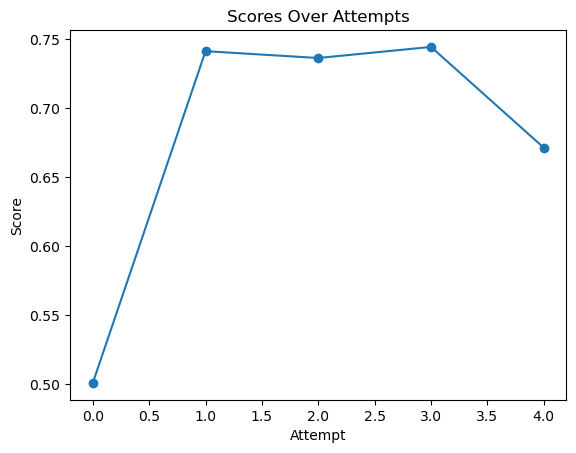

In [11]:
print(scores)
print(len(scores))
plt.plot(range(len(scores)), scores, marker='o')
plt.xlabel('Attempt')
plt.ylabel('Score')
plt.title('Scores Over Attempts')
plt.show()